<a href="https://colab.research.google.com/github/cswcjt/Factor-Momentum/blob/main/VAA(Dual_Momentum)_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
#from pandas.tseries.holiday import USFederalHolidayCalendar
import numpy as np
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import seaborn as sns
import datetime as dt
import pandas as pd
from fredapi import Fred
from functools import reduce
import yfinance as yf
from price_info import *
from backtest import *
from port_weight import *

In [ ]:
def set_weight(series) :
    signal = series.loc["canary_signal"]
    if signal == 0 :
        target_assets1 = series.loc[bond_asset].sort_values().iloc[-5:].index
        return pd.Series([1/len(target_assets1)] * len(target_assets1),
                         index=target_assets1.tolist())
    elif signal == 1 :
        target_assets1 = series.loc[bond_asset].sort_values().iloc[-5:].index
        target_assets2 = series.loc[risky_asset].sort_values().iloc[-5:].index
        return pd.Series([1/(len(target_assets1)+len(target_assets2))] * (len(target_assets1)+len(target_assets2)),
                          index=target_assets1.tolist() + target_assets2.tolist()) 
    elif signal == 2:
        target_assets1 = series.loc[risky_asset].sort_values().iloc[-5:].index
        return pd.Series([1/len(target_assets1)] * len(target_assets1),
                         index=target_assets1.tolist())


In [ ]:
risky_asset = ['GOOGL', 'KO', 'HD', 'INTU', 'PEP', 'NOW', 'TSLA', 'UNH']
bond_asset = ["SHV", "IEF", "TLT", 'IAU', 'SLV', 'VNQ']
canary_asset = ["VWO", "BND"]
#econ_ind = ['UNRATE', 'SP500']
all_tickers = risky_asset + bond_asset + canary_asset

In [ ]:
#econ_df = econ_info(econ_ind)
all_ticker_df = price_info(all_tickers)
#all_ticker_df = pd.concat([all_price_df, econ_df], axis = 1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
all_ticker_df

,GOOGL,KO,HD,INTU,PEP,NOW,TSLA,UNH,SHV,IEF,TLT,IAU,SLV,VNQ,VWO,BND
Date,,,,,,,,,,,,,,,,
1962-01-02,NaN,0.050016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,0.048902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,0.049273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,0.048159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,0.047664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-20,101.139999,59.900002,274.170013,417.820007,168.919998,411.200012,308.730011,522.799988,109.949997,97.790001,106.250000,31.610001,17.730000,87.027321,39.160000,72.750000
2022-09-21,99.279999,59.400002,271.570007,408.679993,168.440002,401.429993,300.799988,512.080017,109.949997,98.180000,108.029999,31.740000,18.059999,85.652214,38.509998,72.949997
2022-09-22,100.139999,59.259998,269.140015,396.709991,168.600006,386.970001,288.589996,517.460022,109.970001,96.699997,105.269997,31.730000,18.090000,84.564003,38.400002,72.199997


In [ ]:
for col in all_ticker_df.columns : 
    print(col, all_ticker_df[col].first_valid_index())
    
start = "2012-06-29"
all_ticker_df = all_ticker_df.loc[start : ]
all_ticker_df

GOOGL 2004-08-19 00:00:00
KO 1962-01-02 00:00:00
HD 1981-09-22 00:00:00
INTU 1993-03-12 00:00:00
PEP 1972-06-01 00:00:00
NOW 2012-06-29 00:00:00
TSLA 2010-06-29 00:00:00
UNH 1984-10-17 00:00:00
SHV 2007-01-11 00:00:00
IEF 2002-07-30 00:00:00
TLT 2002-07-30 00:00:00
IAU 2005-01-28 00:00:00
SLV 2006-04-28 00:00:00
VNQ 2004-09-29 00:00:00
VWO 2005-03-10 00:00:00
BND 2007-04-10 00:00:00


,GOOGL,KO,HD,INTU,PEP,NOW,TSLA,UNH,SHV,IEF,TLT,IAU,SLV,VNQ,VWO,BND
Date,,,,,,,,,,,,,,,,
2012-06-29,14.516266,28.353951,42.213371,53.994999,52.541779,24.600000,2.086000,49.915714,103.670036,90.573235,98.507889,31.120001,26.650000,43.738796,29.899054,64.807037
2012-07-02,14.526276,28.618679,42.229321,54.295223,52.616142,24.770000,2.026667,48.004406,103.660606,90.993469,99.524307,31.120001,26.730000,44.220097,29.929003,64.943268
2012-07-03,14.710460,28.705706,41.145889,54.722839,52.616142,25.309999,2.044000,46.826920,103.670036,90.766556,98.759445,31.600000,27.490000,44.480816,30.475620,64.850899
2012-07-05,14.912913,28.448235,41.512344,54.513573,52.177429,25.959999,2.082000,47.620445,103.660606,91.010292,99.264099,31.260000,26.879999,44.206730,30.213539,65.035645
2012-07-06,14.664164,28.339441,41.544197,52.808029,52.214607,25.840000,2.066000,47.628975,103.670036,91.329636,100.186562,30.840000,26.299999,44.313675,29.666918,65.097198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-20,101.139999,59.900002,274.170013,417.820007,168.919998,411.200012,308.730011,522.799988,109.949997,97.790001,106.250000,31.610001,17.730000,87.027321,39.160000,72.750000
2022-09-21,99.279999,59.400002,271.570007,408.679993,168.440002,401.429993,300.799988,512.080017,109.949997,98.180000,108.029999,31.740000,18.059999,85.652214,38.509998,72.949997
2022-09-22,100.139999,59.259998,269.140015,396.709991,168.600006,386.970001,288.589996,517.460022,109.970001,96.699997,105.269997,31.730000,18.090000,84.564003,38.400002,72.199997


In [ ]:
###1.3 cash 만들어주기
# all_ticker_df['CASH'] = 0.005/250
# all_ticker_df['CASH'] = (1 + all_ticker_df['CASH']).cumprod()
# all_ticker_df.dropna(inplace = True)
# all_ticker_df.index.name = "date_time"
# all_ticker_df

In [ ]:
# 1.4 drop the repeated columns 
all_ticker_df.index.name = "date_time"
price_df = all_ticker_df.loc[:,~all_ticker_df.columns.duplicated()].copy()
price_df.isna().sum()
price_df#.to_csv("./price_df")

,GOOGL,KO,HD,INTU,PEP,NOW,TSLA,UNH,SHV,IEF,TLT,IAU,SLV,VNQ,VWO,BND
date_time,,,,,,,,,,,,,,,,
2012-06-29,14.516266,28.353951,42.213371,53.994999,52.541779,24.600000,2.086000,49.915714,103.670036,90.573235,98.507889,31.120001,26.650000,43.738796,29.899054,64.807037
2012-07-02,14.526276,28.618679,42.229321,54.295223,52.616142,24.770000,2.026667,48.004406,103.660606,90.993469,99.524307,31.120001,26.730000,44.220097,29.929003,64.943268
2012-07-03,14.710460,28.705706,41.145889,54.722839,52.616142,25.309999,2.044000,46.826920,103.670036,90.766556,98.759445,31.600000,27.490000,44.480816,30.475620,64.850899
2012-07-05,14.912913,28.448235,41.512344,54.513573,52.177429,25.959999,2.082000,47.620445,103.660606,91.010292,99.264099,31.260000,26.879999,44.206730,30.213539,65.035645
2012-07-06,14.664164,28.339441,41.544197,52.808029,52.214607,25.840000,2.066000,47.628975,103.670036,91.329636,100.186562,30.840000,26.299999,44.313675,29.666918,65.097198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-20,101.139999,59.900002,274.170013,417.820007,168.919998,411.200012,308.730011,522.799988,109.949997,97.790001,106.250000,31.610001,17.730000,87.027321,39.160000,72.750000
2022-09-21,99.279999,59.400002,271.570007,408.679993,168.440002,401.429993,300.799988,512.080017,109.949997,98.180000,108.029999,31.740000,18.059999,85.652214,38.509998,72.949997
2022-09-22,100.139999,59.259998,269.140015,396.709991,168.600006,386.970001,288.589996,517.460022,109.970001,96.699997,105.269997,31.730000,18.090000,84.564003,38.400002,72.199997


In [ ]:
price_df

,GOOGL,KO,HD,INTU,PEP,NOW,TSLA,UNH,SHV,IEF,TLT,IAU,SLV,VNQ,VWO,BND
date_time,,,,,,,,,,,,,,,,
2012-06-29,14.516266,28.353951,42.213371,53.994999,52.541779,24.600000,2.086000,49.915714,103.670036,90.573235,98.507889,31.120001,26.650000,43.738796,29.899054,64.807037
2012-07-02,14.526276,28.618679,42.229321,54.295223,52.616142,24.770000,2.026667,48.004406,103.660606,90.993469,99.524307,31.120001,26.730000,44.220097,29.929003,64.943268
2012-07-03,14.710460,28.705706,41.145889,54.722839,52.616142,25.309999,2.044000,46.826920,103.670036,90.766556,98.759445,31.600000,27.490000,44.480816,30.475620,64.850899
2012-07-05,14.912913,28.448235,41.512344,54.513573,52.177429,25.959999,2.082000,47.620445,103.660606,91.010292,99.264099,31.260000,26.879999,44.206730,30.213539,65.035645
2012-07-06,14.664164,28.339441,41.544197,52.808029,52.214607,25.840000,2.066000,47.628975,103.670036,91.329636,100.186562,30.840000,26.299999,44.313675,29.666918,65.097198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-20,101.139999,59.900002,274.170013,417.820007,168.919998,411.200012,308.730011,522.799988,109.949997,97.790001,106.250000,31.610001,17.730000,87.027321,39.160000,72.750000
2022-09-21,99.279999,59.400002,271.570007,408.679993,168.440002,401.429993,300.799988,512.080017,109.949997,98.180000,108.029999,31.740000,18.059999,85.652214,38.509998,72.949997
2022-09-22,100.139999,59.259998,269.140015,396.709991,168.600006,386.970001,288.589996,517.460022,109.970001,96.699997,105.269997,31.730000,18.090000,84.564003,38.400002,72.199997


In [ ]:
###1.5 리밸 날짜 정한다.
rebal_dates = get_rebal_dates(price_df)
rebal_dates

DatetimeIndex(['2012-06-29', '2012-07-31', '2012-08-31', '2012-09-28',
               '2012-10-31', '2012-11-30', '2012-12-31', '2013-01-31',
               '2013-02-28', '2013-03-28',
               ...
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-29', '2022-05-31', '2022-06-30', '2022-07-29',
               '2022-08-31', '2022-09-26'],
              dtype='datetime64[ns]', length=124, freq=None)

In [ ]:
##### PART2. MOMENTUM
###2.1 : TOTAL MOMENTUM 
momentum_df = price_df.loc[rebal_dates].copy()
momentum_result_df = (12 * momentum_df.pct_change(1)) + (4 * momentum_df.pct_change(3)) \
                                                      + (2 * momentum_df.pct_change(6)) \
                                                      + (1 * momentum_df.pct_change(12))

momentum_result_df = momentum_result_df.dropna()
momentum_result_df.head()

###2.2 : MOMENTUM SCORE OF CANARY ASSET
canary_signal_series = (momentum_result_df[canary_asset] > 0).sum(axis=1)
canary_signal_series
momentum_result_df['canary_signal'] = canary_signal_series
momentum_result_df

###2.3 : weight
target_weight_df = momentum_result_df.apply(set_weight, axis=1).fillna(0)
target_weight_df.sum(axis = 1)

2013-06-28    1.0
2013-07-31    1.0
2013-08-30    1.0
2013-09-30    1.0
2013-10-31    1.0
             ... 
2022-05-31    1.0
2022-06-30    1.0
2022-07-29    1.0
2022-08-31    1.0
2022-09-26    1.0
Length: 112, dtype: float64

<AxesSubplot:xlabel='date_time'>

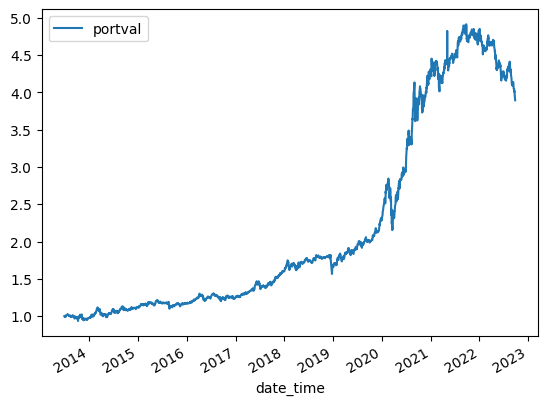

In [ ]:
### 3. portfolio value 
individual_port_val_df = calculate_portvals(price_df, target_weight_df)
individual_port_val_df.sum(axis=0)
portval_df = individual_port_val_df.sum(axis=1).to_frame("portval")
portval_df.plot()

In [ ]:
portval_df.to_csv("./portval_df.csv")

In [ ]:
get_sharpe_ratio(get_returns_df(portval_df, log = True)).to_frame("sharpe_ratio")

,sharpe_ratio
portval,0.768785


In [ ]:
get_CAGR_series(portval_df).to_frame("CARG")

,CARG
portval,0.157218


,drawdown mean,drawdown std,longest days,longest period
portval,14,42,367,2021-09-24 ~ 2022-09-26


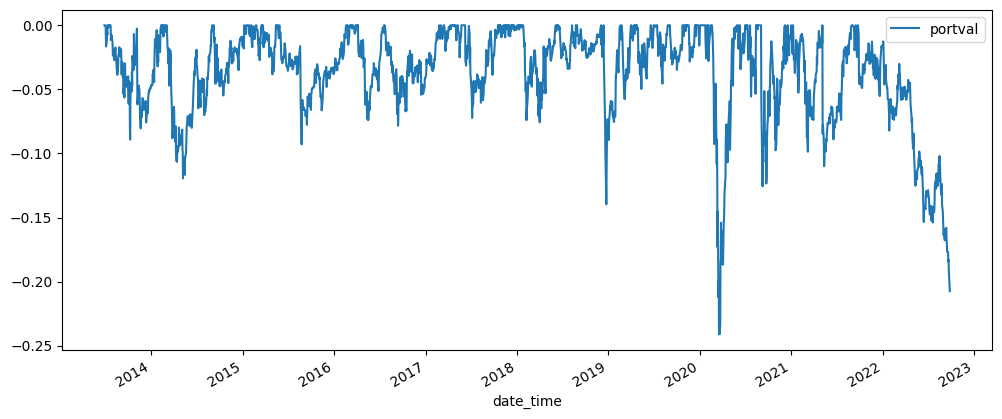

In [ ]:
### 4. backtesting
get_sharpe_ratio(get_returns_df(portval_df, log = True)).to_frame("sharpe_ratio")
get_CAGR_series(portval_df).to_frame("CARG")
dd_df, mdd_series, longest_dd_period_df = get_drawdown_infos(portval_df)
dd_df.plot(figsize = (12, 5))
longest_dd_period_df

In [ ]:
mdd_series.to_frame("MDD")

,MDD
portval,-0.241117


In [ ]:
### 비교를 위한 작업
result_portval_dict = {}
result_portval_dict['daa_first'] = individual_port_val_df.sum(axis=1)

In [ ]:
### 성능 향상을 위한 방법론 고민해보자.

In [ ]:
### 1. 안전자산군을 다양화하자.

In [ ]:
individual_port_val_df.sum(axis=0)

BND        0.000000
GOOGL    399.565932
HD       377.418517
IAU      410.590843
IEF      404.662336
INTU     484.696169
KO       164.059639
NOW      452.846266
PEP      229.086892
SHV      408.557223
SLV      241.804455
TLT      297.982621
TSLA     430.009912
UNH      387.070808
VNQ      366.170672
VWO        0.000000
dtype: float64

array([[<AxesSubplot:title={'center':'SHV'}>,
        <AxesSubplot:title={'center':'IEF'}>],
       [<AxesSubplot:title={'center':'TLT'}>,
        <AxesSubplot:title={'center':'IAU'}>],
       [<AxesSubplot:title={'center':'SLV'}>,
        <AxesSubplot:title={'center':'VNQ'}>]], dtype=object)

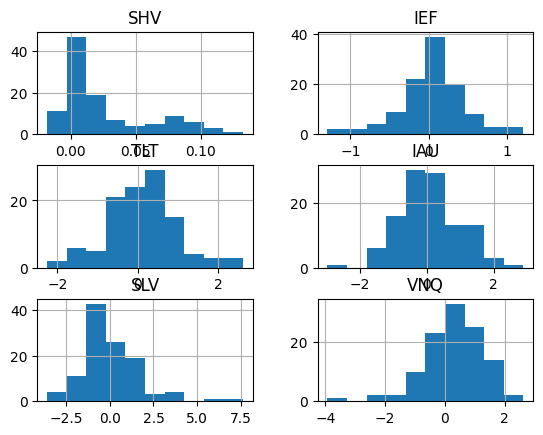

In [ ]:
momentum_result_df[bond_asset].hist()

[(-10.0, 40.0)]

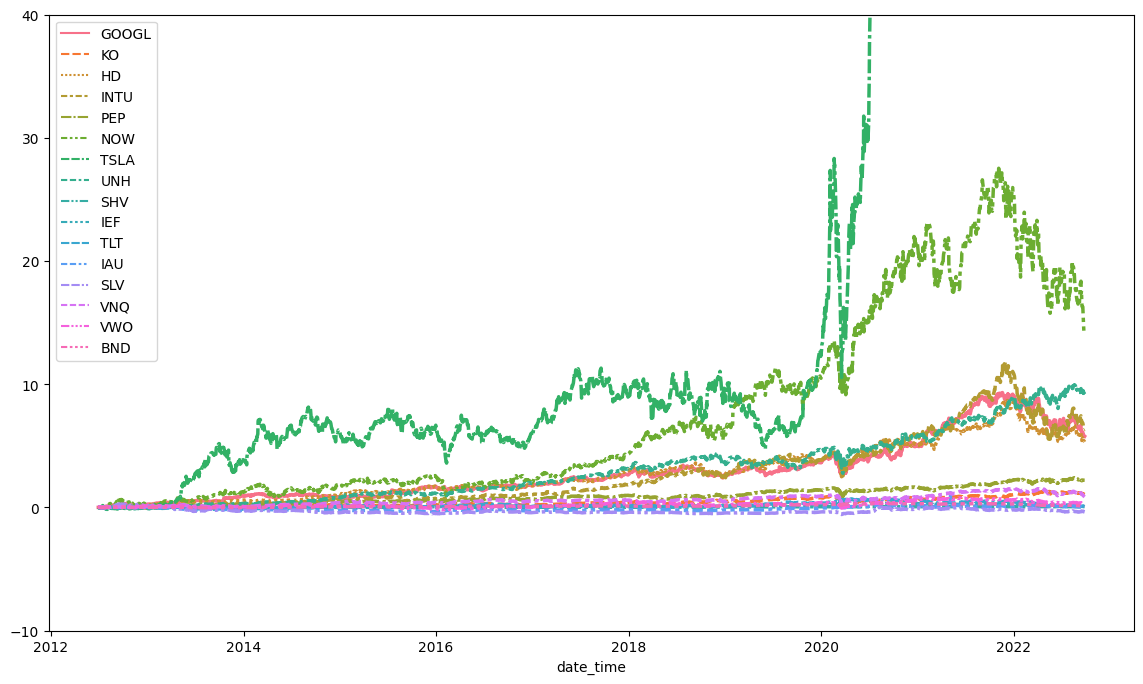

In [ ]:
my_data = (price_df / price_df.iloc[0]) -1
my_data
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (14,8))
line = sns.lineplot(data=my_data, linewidth=2.5, ax = ax)
line.set(ylim=(-10, 40))

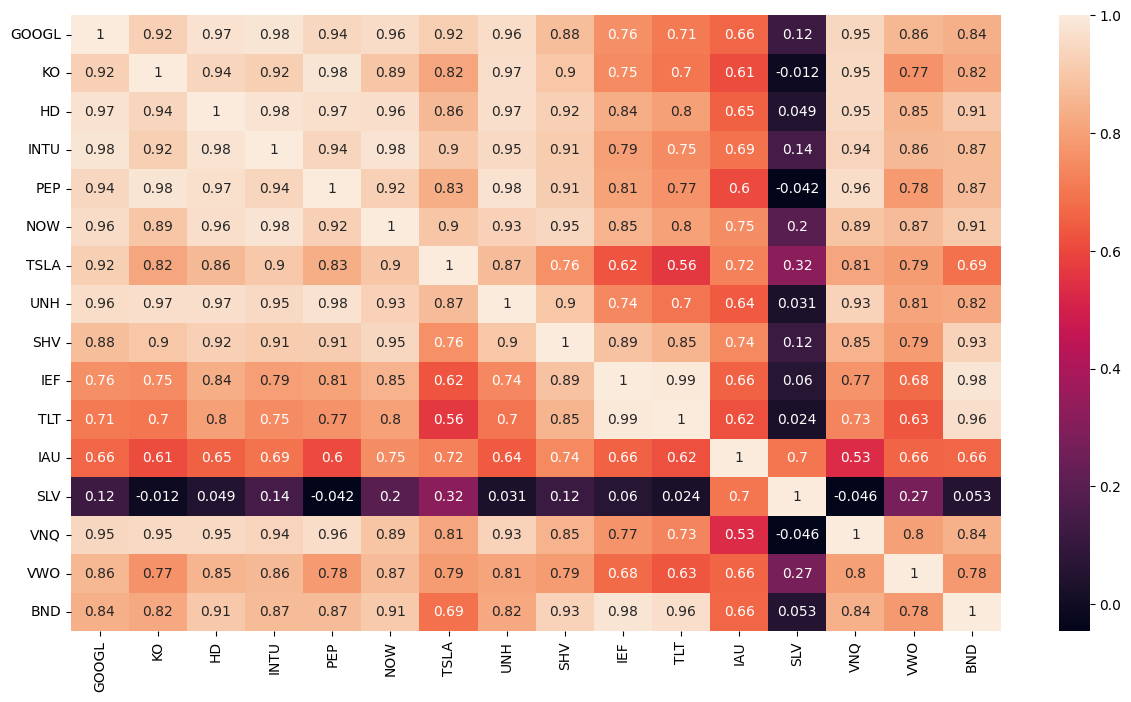

In [ ]:
my_data.corr()
sns.heatmap(my_data.corr(), annot=True)
# heatmap = sns.heatmap(my_data.corr(), annot=True, cmap="YlGnBu")
# heatmap = sns.heatmap(my_data.corr(), annot=True, cmap="YlGnBu", figsize = (14,8))
plt.gcf().set_size_inches(15, 8)

In [ ]:
def pct_corr(df1, df2, size = (15,8)) : 
    df1_pct = df1.pct_change()
    df2_pct = df2.pct_change()
    df3 = pd.concat([df1,df2], axis = 1)
    
    start = [df3[col].first_valid_index() for col in df3.columns]
    start_date =min(start) 
    df4 = df3.loc[start_date : ]
    df4.dropna(inplace =True)
    print(df4.head())
    df4.corr()
    sns.heatmap(df4.corr(), annot=True)
    return plt.gcf().set_size_inches(size)

In [ ]:
### 미래에셋에서 뽑은 자산들과 움직임이 반대인 자산들 추려서 안전 자산으로 설정해보자
# 1. 부동산 

real_estate = ["VNQI", "FREL", "GQRE", "FFR"]
df1 = price_info(real_estate)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
VNQI
FREL
GQRE
FFR


Timestamp('2007-08-30 00:00:00')

In [ ]:
df2 = all_ticker_df

In [ ]:
df2

,GOOGL,KO,HD,INTU,PEP,NOW,TSLA,UNH,SHV,IEF,TLT,IAU,SLV,VNQ,VWO,BND
date_time,,,,,,,,,,,,,,,,
2012-06-29,14.516266,28.353951,42.213371,53.994999,52.541779,24.600000,2.086000,49.915714,103.670036,90.573235,98.507889,31.120001,26.650000,43.738796,29.899054,64.807037
2012-07-02,14.526276,28.618679,42.229321,54.295223,52.616142,24.770000,2.026667,48.004406,103.660606,90.993469,99.524307,31.120001,26.730000,44.220097,29.929003,64.943268
2012-07-03,14.710460,28.705706,41.145889,54.722839,52.616142,25.309999,2.044000,46.826920,103.670036,90.766556,98.759445,31.600000,27.490000,44.480816,30.475620,64.850899
2012-07-05,14.912913,28.448235,41.512344,54.513573,52.177429,25.959999,2.082000,47.620445,103.660606,91.010292,99.264099,31.260000,26.879999,44.206730,30.213539,65.035645
2012-07-06,14.664164,28.339441,41.544197,52.808029,52.214607,25.840000,2.066000,47.628975,103.670036,91.329636,100.186562,30.840000,26.299999,44.313675,29.666918,65.097198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-20,101.139999,59.900002,274.170013,417.820007,168.919998,411.200012,308.730011,522.799988,109.949997,97.790001,106.250000,31.610001,17.730000,87.027321,39.160000,72.750000
2022-09-21,99.279999,59.400002,271.570007,408.679993,168.440002,401.429993,300.799988,512.080017,109.949997,98.180000,108.029999,31.740000,18.059999,85.652214,38.509998,72.949997
2022-09-22,100.139999,59.259998,269.140015,396.709991,168.600006,386.970001,288.589996,517.460022,109.970001,96.699997,105.269997,31.730000,18.090000,84.564003,38.400002,72.199997


/var/folders/k4/qhbh8yls6h349rdp_mfbt60w0000gn/T/ipykernel_70753/3957786161.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.dropna(inplace =True)


                 VNQI       FREL       GQRE        FFR      GOOGL         KO  \
2015-02-05  41.591789  18.786142  47.743568  37.587059  26.491501  32.554024   
2015-02-06  41.203285  18.314009  47.222775  36.848965  26.694000  32.289173   
2015-02-09  40.719494  18.237865  46.597847  36.447830  26.464001  32.117790   
2015-02-10  40.961395  18.291172  46.758095  36.720589  27.007999  33.029209   
2015-02-11  40.866085  18.260706  46.774113  36.511997  26.900000  33.005825   

                   HD       INTU        PEP        NOW       TSLA        UNH  \
2015-02-05  91.419891  85.932831  77.150063  74.220001  14.732667  96.656212   
2015-02-06  91.461853  82.297249  77.229927  74.940002  14.490667  95.572586   
2015-02-09  90.874680  82.306641  76.638977  72.879997  14.498667  94.586670   
2015-02-10  92.829056  83.524734  78.252090  73.320000  14.419333  96.789444   
2015-02-11  92.527092  83.196793  80.176651  73.879997  14.186667  97.571098   

                   SHV        IEF     

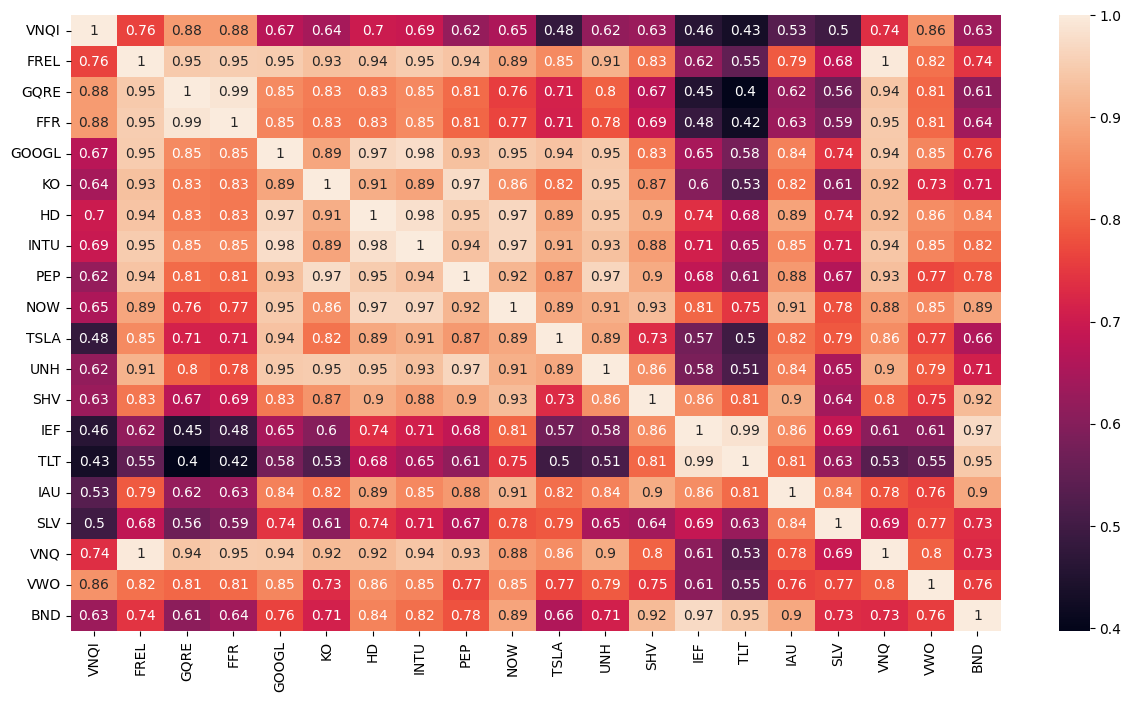

In [ ]:
pct_corr(df1, df2, size = (15,8))

### 전세계 서른 개의 국가 부동산에 투자하는 VNQI가 가장 상관관계가 낮다.  

In [ ]:
shortterm = ['BSV','PGHY']

shortterm_df = price_info(shortterm)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
for col in shortterm_df.columns : 
    print(col, shortterm_df[col].first_valid_index())

BSV 2007-04-10 00:00:00
PGHY 2013-06-21 00:00:00


/var/folders/k4/qhbh8yls6h349rdp_mfbt60w0000gn/T/ipykernel_70753/3957786161.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.dropna(inplace =True)


                  BSV       PGHY      GOOGL         KO         HD       INTU  \
2013-06-21  68.786362  15.418136  22.045296  29.646561  59.998260  53.203991   
2013-06-24  68.614471  15.380321  21.766518  29.475063  59.746307  52.882153   
2013-06-25  68.666023  15.348804  21.676678  29.616743  60.258358  54.077549   
2013-06-26  68.751968  15.392926  21.863113  30.071592  61.501862  54.666050   
2013-06-27  68.855164  15.500087  21.948700  30.019390  61.989540  55.898220   

                  PEP        NOW      TSLA        UNH         SHV        IEF  \
2013-06-21  61.353710  39.240002  6.636667  55.418808  103.697296  87.012856   
2013-06-24  61.353710  39.430000  6.766000  56.069275  103.706703  86.799652   
2013-06-25  61.284782  39.599998  6.826667  55.271374  103.706703  86.697334   
2013-06-26  62.249546  40.889999  7.048000  56.182018  103.697296  87.047012   
2013-06-27  62.586441  40.930000  7.283333  57.318146  103.697296  87.516014   

                  TLT        IAU      

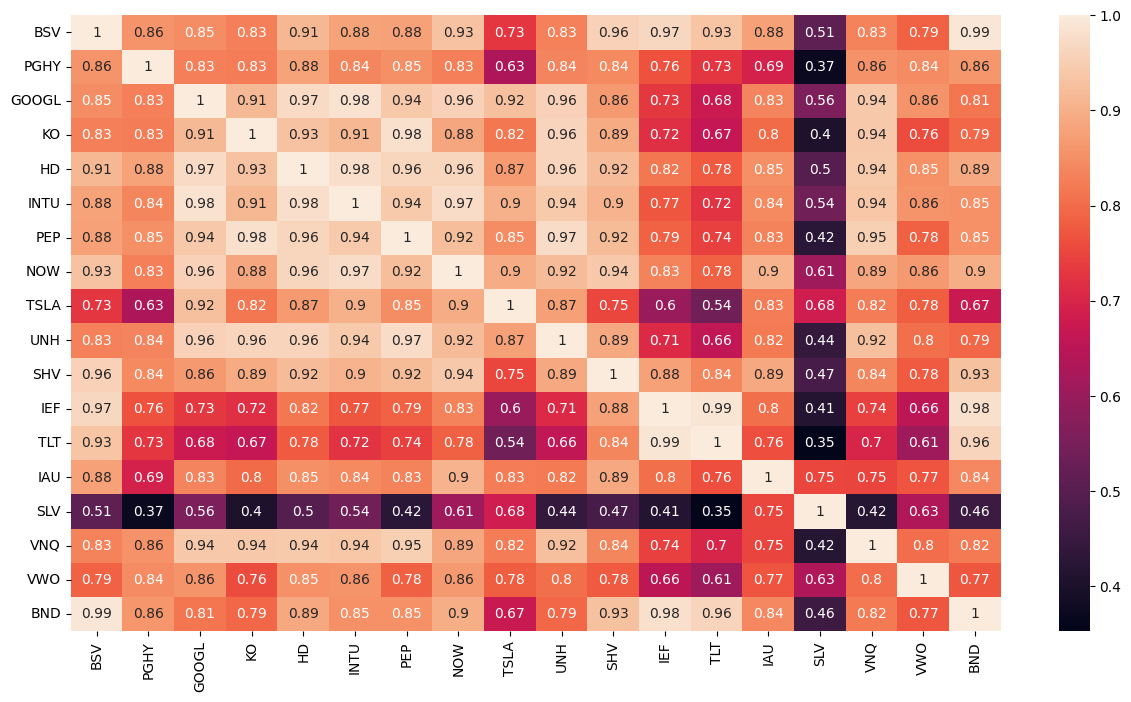

In [ ]:
pct_corr(shortterm_df, df2, size = (15,8))

# ['BSV','PGHY'] 둘 다 선택해보자

In [ ]:
## 에너지
energy = ['NEE',
 'DUK',
 'D',
 'XEL',
 'CNP',
 'DTE',
 'WEC',
 'VLO',
 'ES',
 'ATO',
 'DVN',
 'EVRG',
 'LNT',
 'NRG',
 'CTRA',
 'SRE',
 'CMS',
 'SM',
 'OGE',
 'FANG',
 'SWN',
 'CNX',
 'PTEN',
 'CHRD',
 'PBF',
 'AEIS',
 'PDCE',
 'GPRE',
 'HLX',
 'SXC',
 'ENPH',
 'ESOA',
 'CGRN',
 'CBAT',
 'CLNE',
 'ERII',
 'FCEL',
 'HNRG',
 'MGEE',
 'CREG',
 'DQ',
 'OESX',
 'VTNR',
 'EPSN',
 'EFOI',
 'USEG',
 'AMPY']
len(energy)

47

In [ ]:
energy_df = price_info(energy)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
df1
df1_1 = energy_df.iloc[:,0:8]
df1_2 = energy_df.iloc[:,8:16]
df1_3 = energy_df.iloc[:,16:24]
df1_4 = energy_df.iloc[:,24:32]
df1_5 = energy_df.iloc[:,32:40]
df1_6 = energy_df.iloc[:,40:]

/var/folders/k4/qhbh8yls6h349rdp_mfbt60w0000gn/T/ipykernel_70753/3957786161.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.dropna(inplace =True)


                  CMS         SM        OGE       FANG        SWN        CNX  \
2012-10-12  17.389030  52.954342  19.748081  15.552217  36.110001  28.367107   
2012-10-15  17.491882  52.781631  19.950090  15.774394  36.189999  27.737450   
2012-10-16  17.513918  53.904236  19.915260  15.809938  36.110001  28.084572   
2012-10-17  17.756348  55.017239  19.953569  15.729960  36.099998  28.924118   
2012-10-18  17.866552  55.285900  20.037165  15.729960  35.990002  29.125937   

                 PTEN       CHRD      GOOGL         KO  ...      TSLA  \
2012-10-12  14.939692  24.048525  18.637386  27.915073  ...  1.842667   
2012-10-15  14.895677  23.728502  18.543043  27.842054  ...  1.822000   
2012-10-16  15.247822  24.251465  18.636135  27.674112  ...  1.870667   
2012-10-17  15.687999  24.259272  18.906157  27.557278  ...  1.921333   
2012-10-18  15.679197  24.228048  17.392391  27.630301  ...  1.869333   

                  UNH         SHV        IEF        TLT        IAU        SLV  \

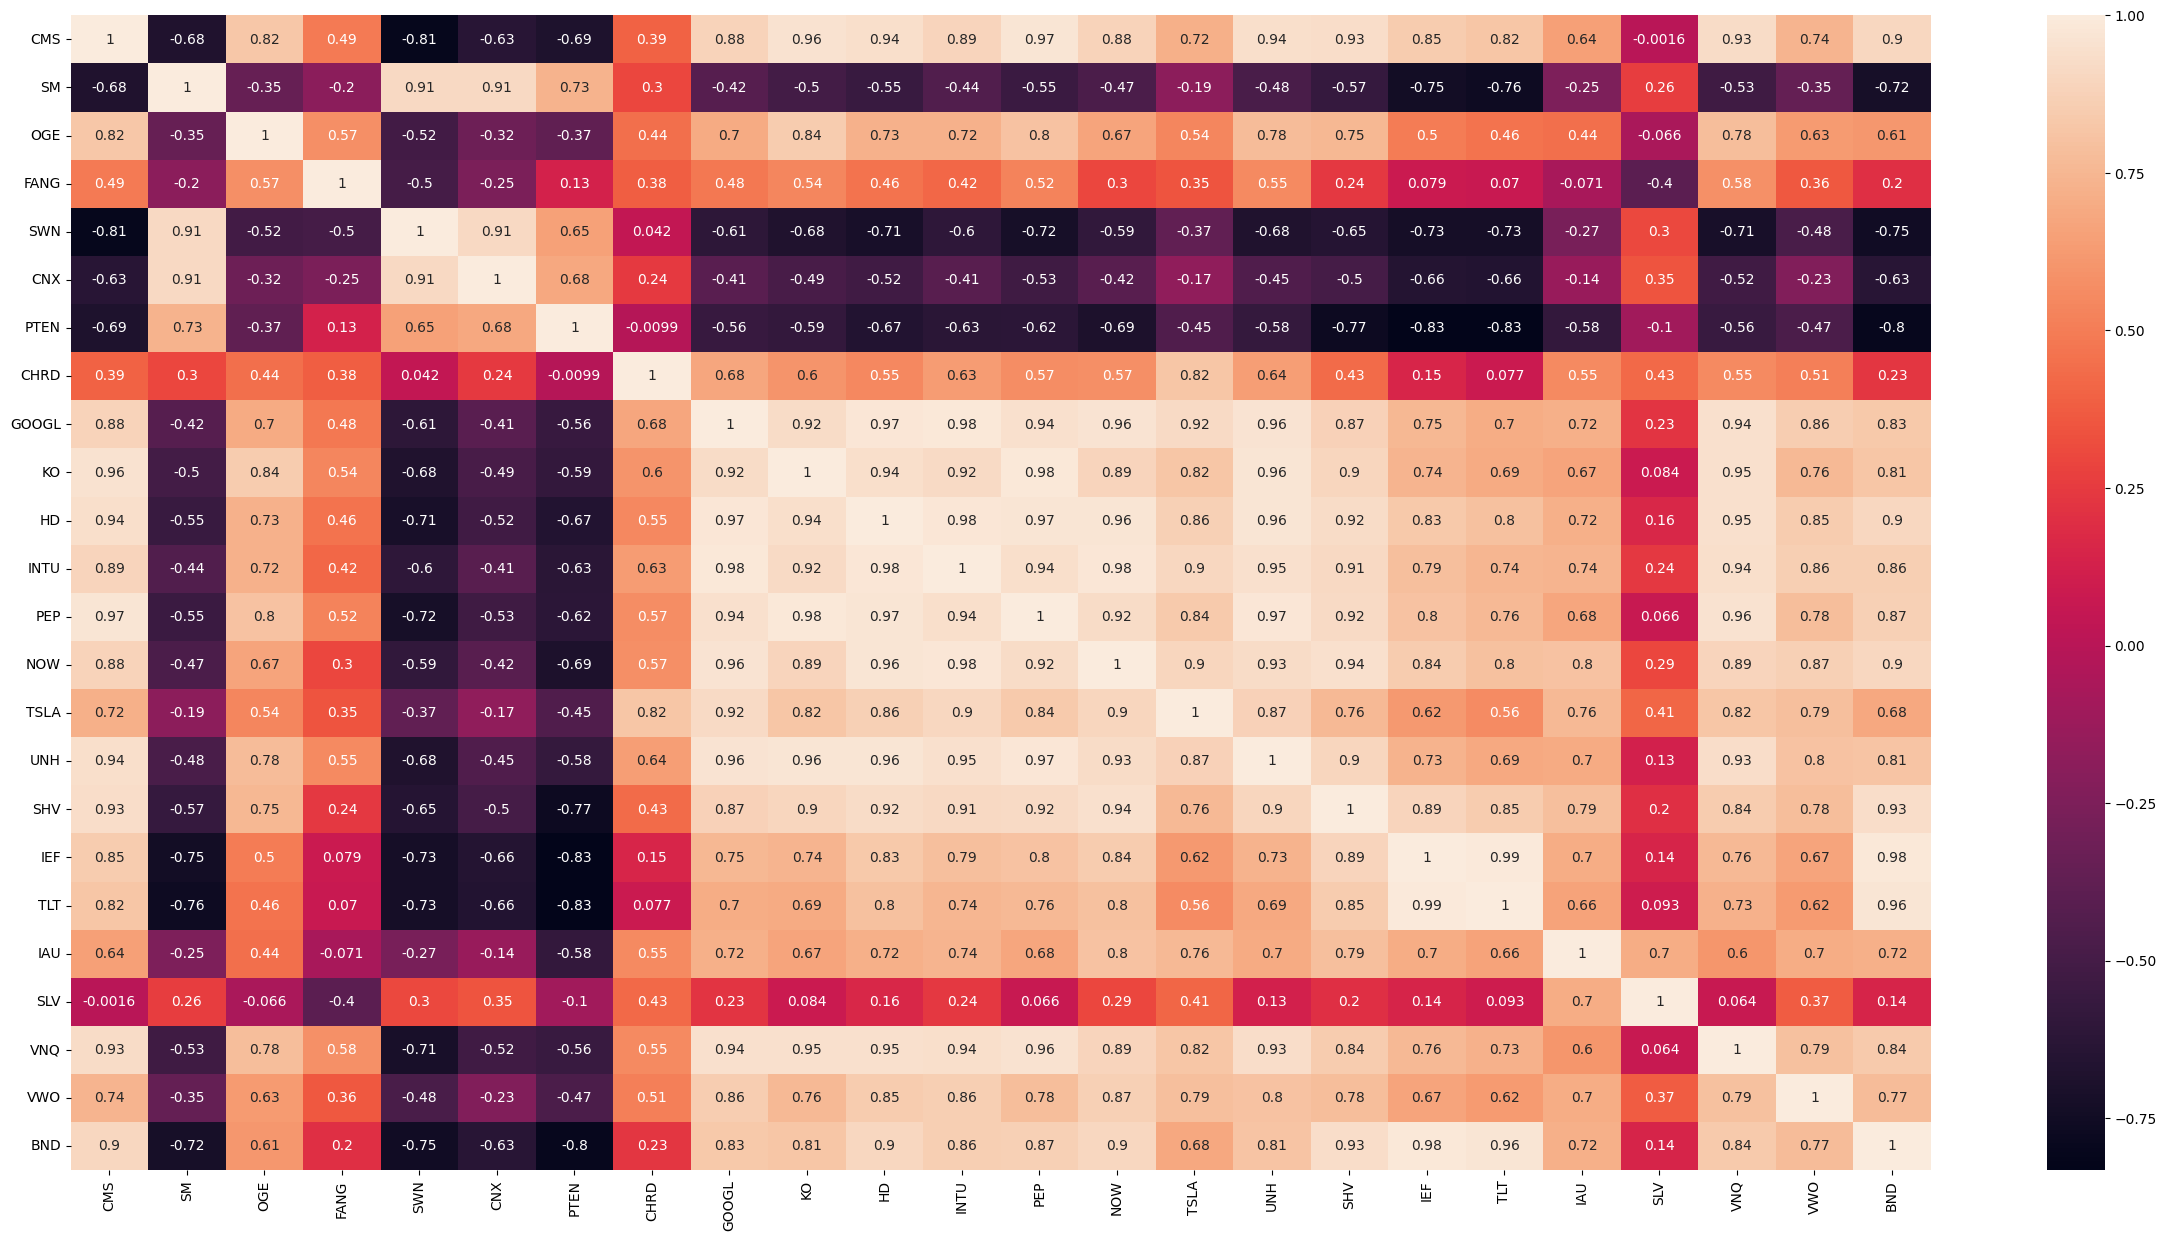

In [ ]:
pct_corr(df1_3, df2, (30,15))

# ["CNP", "VLO", "CTRA", "SM", "OGE", "FANG","SWN", ""CNX","PTEN","CGRN","FCEL","HNRG",CREG, "EFOI", "USEG", "AMPY"]

In [ ]:
# 부동산, 단기금융상품, 에너지
real_et =["VNQI"]
shortterm = ['BSV','PGHY']
energy = ["CNP", "VLO", "SWN", "CTRA", "SM", "OGE", "FANG","SWN", "CNX","PTEN","CGRN","FCEL","HNRG", "CREG", "EFOI", "USEG", "AMPY"]
alter = real_et + shortterm + energy
alter
alter_df = price_info(alter)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

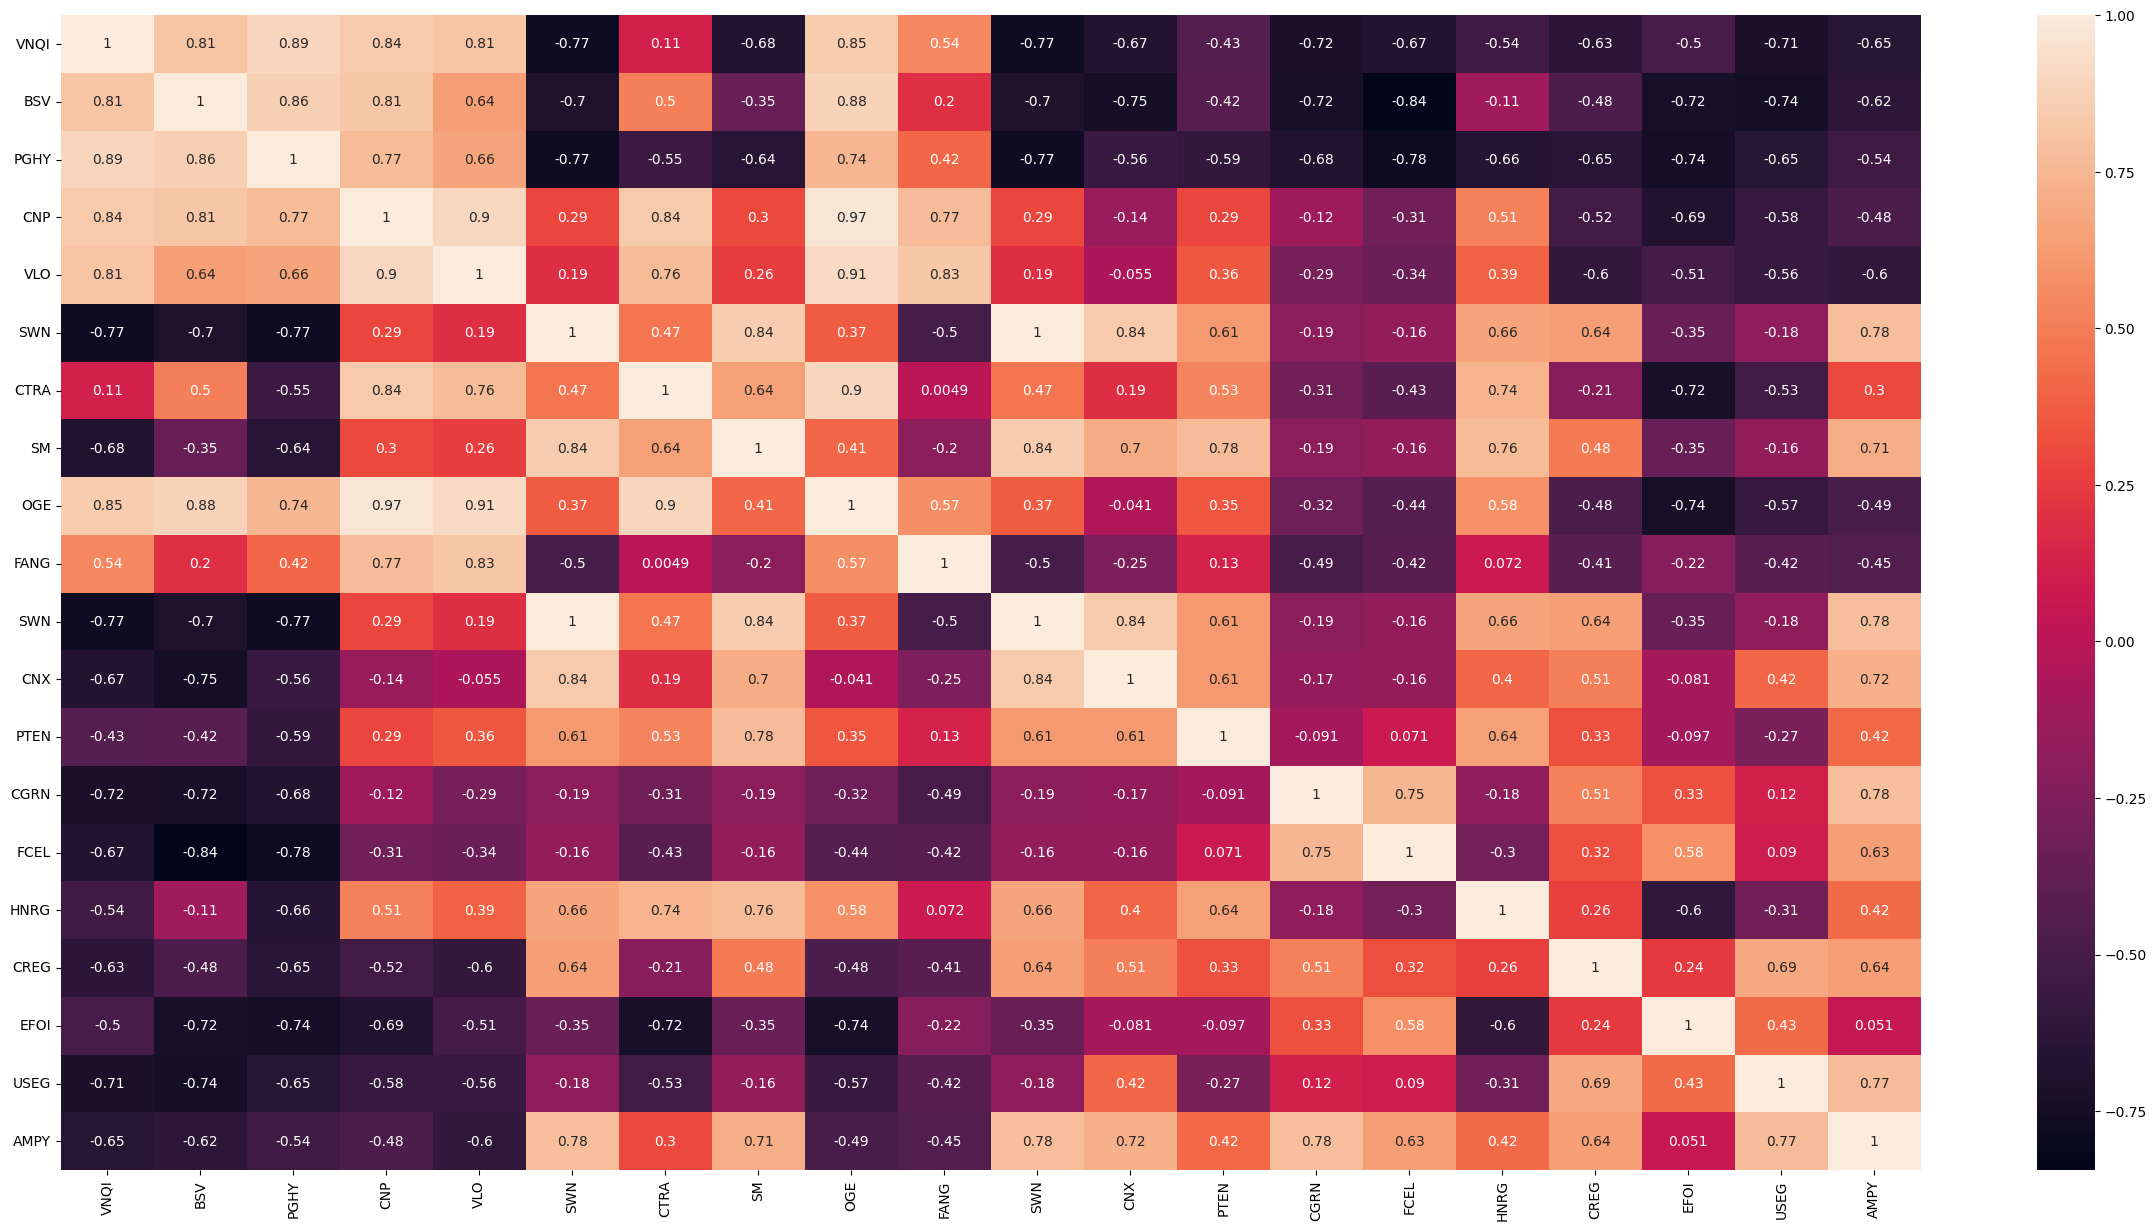

In [ ]:
alter_df.corr()
sns.heatmap(alter_df.corr(), annot=True)
plt.gcf().set_size_inches(30, 15)

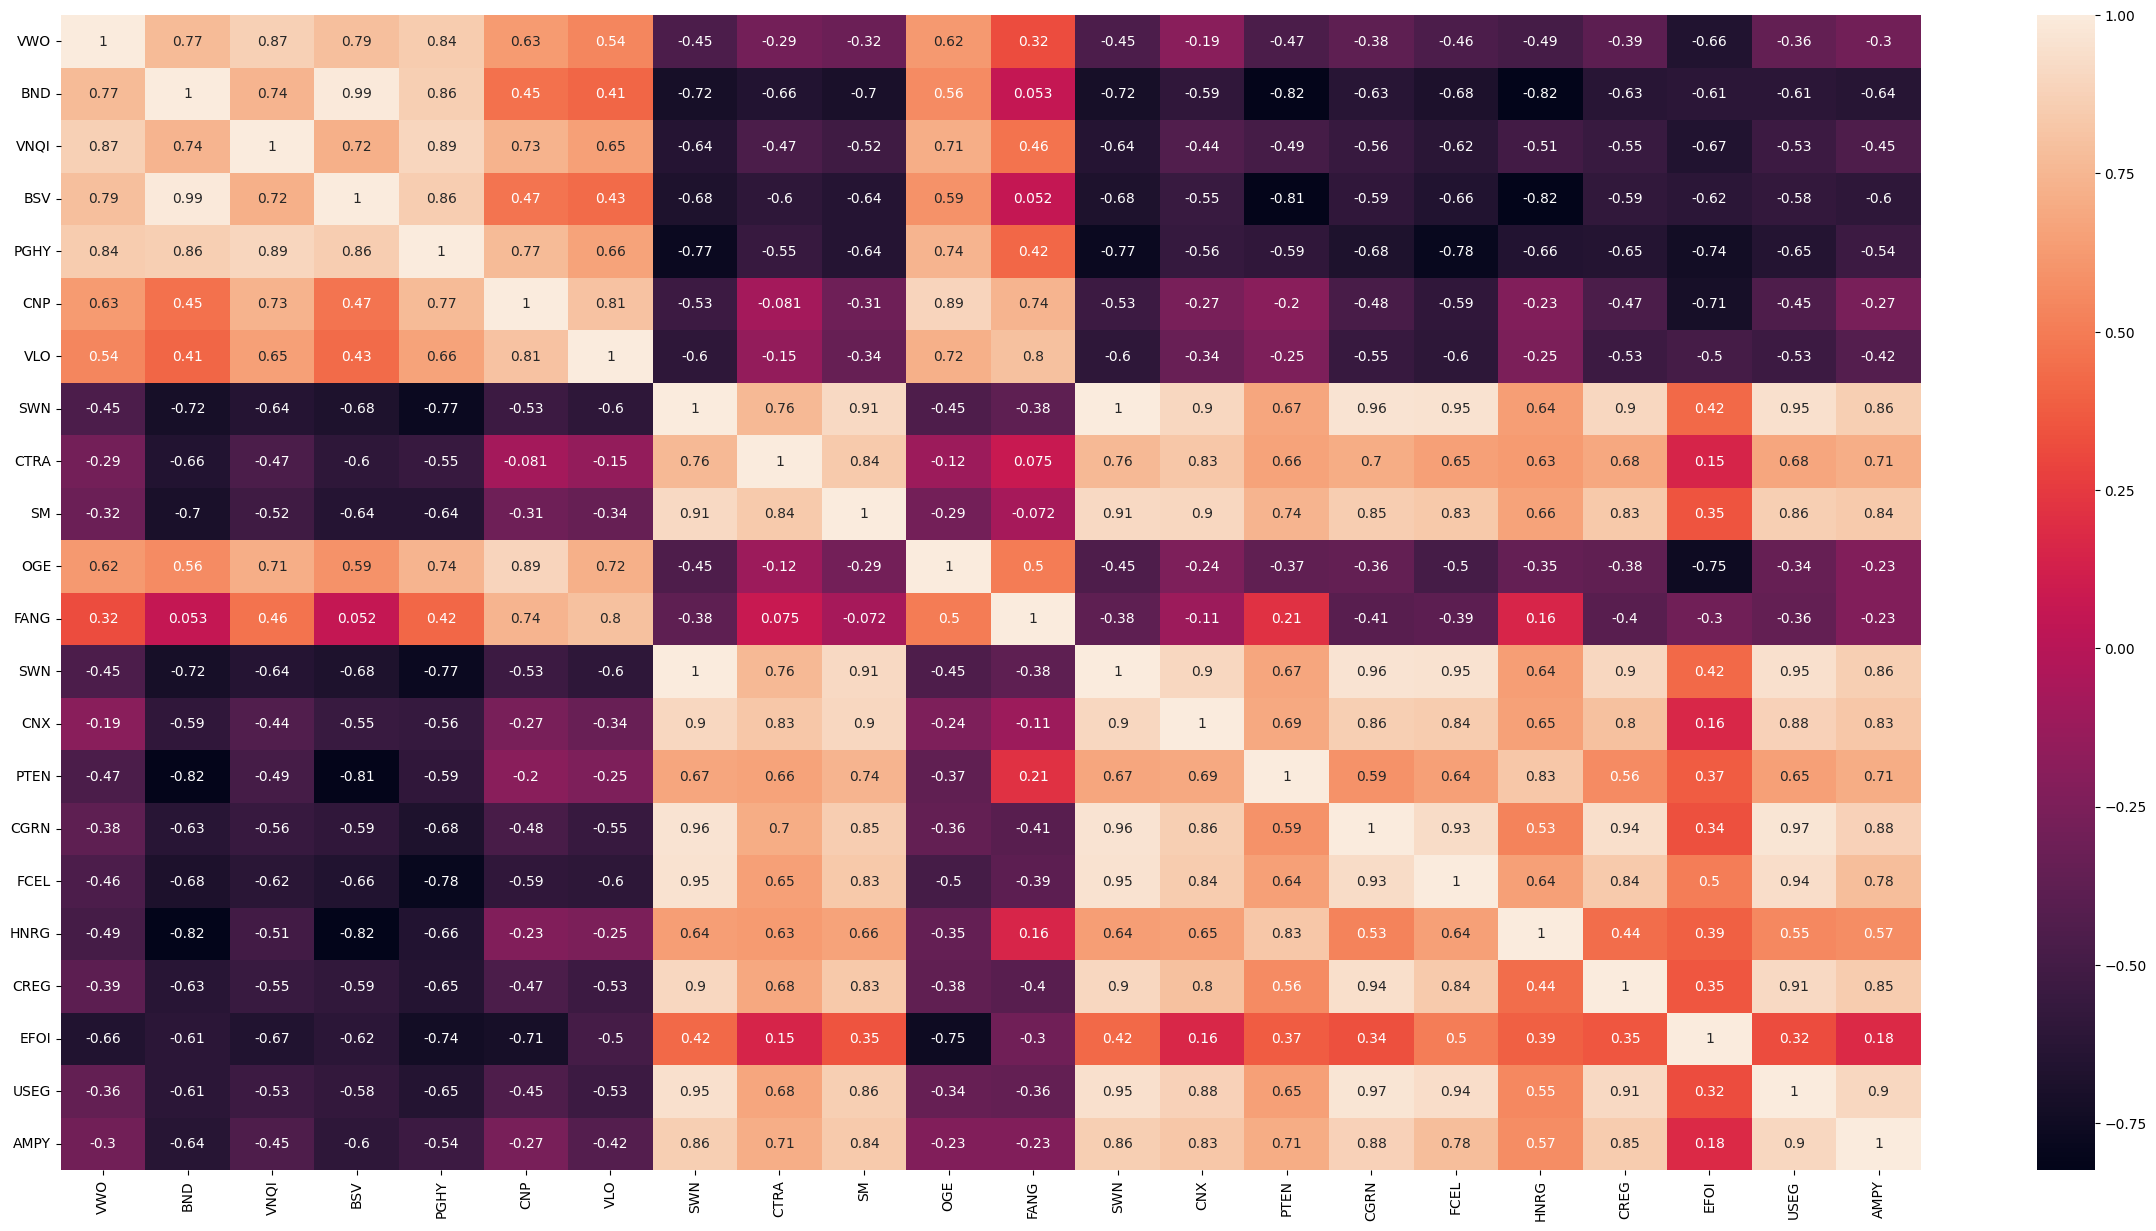

In [ ]:
test_with_canary = pd.concat([price_df[canary_asset], alter_df], axis = 1)
test_with_canary.dropna(inplace = True)
test_with_canary.corr()
sns.heatmap(test_with_canary.corr(), annot=True)
plt.gcf().set_size_inches(30, 15)